<a href="https://colab.research.google.com/github/CaptainPowerTurtle/AIBlogWithFastPages/blob/master/New_FindWaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finding Waldo**

The overall goal of the project is to make a model that should be able to take a given “where is waldo” picture, and point out where in that picture Waldo is.

##Setup

In [3]:
# Find Waldo
#hide
!pip install -Uqq fastbook
!pip3 install git+https://github.com/fastai/fastai.git
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.8 MB/s 
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.7 MB/s 
     |████████████████████████████████| 188 kB 65.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 51 kB 391 kB/s 
  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-2hqtupnc
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-2hqtupnc
  Created wheel for fastai: filename=fastai-2.5.1-py3-none-any.whl size=186242 sha256=997aa1251a436a30ad7e1e41a880b28ea2be9775e4c646c4395129e2e2a85ba6
  Stored in directory: /tmp/pip-ephem-wheel-cache-bwids3ij/wheels/e2/81/30/9d0af3c5b8212ceb1118de039a8973c37f047102062f346d19
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.0
    Uninstalling fastai-2.5.0:
      Successfully uninstalled fastai-2.5.0
Mounted at /content/gdrive


In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from PIL import Image, ImageOps
import os

## Data Collection

Since we are not the only people who thought this as a good starter project, we are lucky that there already exists a pretty good data collection which we found here https://github.com/vc1492a/Hey-Waldo.
This is a dataset made from painstakenly finding Waldo as you normally would, and then manually categorizing each image as "Waldo" or "NotWaldo".

In [5]:
basePath = Path('gdrive/MyDrive/WhereIsWaldo2')

Seems to not be enough data found https://github.com/tadejmagajna/HereIsWally/tree/master/images, which shares a lot of the same images. But it also has more. The new images however are not categorized, or in the same format. They are only in the original size and not categorized.

##Data Preparation

Since we needed more data, and for eventually using the trained model, we needed a way to take an image and cut it into the same format as our data.  
  
This code does exactly that, it is commented out so it is not run by accident, which can happen in a notebook like this.  
  
The good part of this way of cutting the images, is that we are able to stick them back together due to the naming scheme the images get. And we'll want to use that for prediction, to show the user where in the image waldo is.

In [6]:
#Split image method

def sliceImg(filePath, savePath, slizeSize):
  img = Image.open(filePath)
  width, height = img.size
  imgName = filePath.split('/')[-1].replace('.jpg', '')

  if not os.path.exists(savePath+'/Img'+imgName+'_'+str(slizeSize)):
    os.makedirs(savePath+'/Img'+imgName+'_'+str(slizeSize))

  for x0 in range(0, width, slizeSize):
    for y0 in range(0, height, slizeSize):
      box = (x0, y0, x0+slizeSize if x0+slizeSize < width else width - 1, y0+slizeSize if y0+slizeSize < height else height - 1)
      print('%s.x%03d.y%03d.jpg' % (savePath+'/Img'+imgName+'_'+str(slizeSize)+'/'+imgName, x0, y0))
      img.crop(box).save('%s.x%03d.y%03d.jpg' % (savePath+'/Img'+imgName+'_'+str(slizeSize)+'/'+imgName, x0, y0))


In [13]:
#Merge image methods

def getOffsets(file):
  print(file)
  return [int(dimension[1:]) for dimension in file.split('.')[1:4]]

def mergeImg(imgName, imgPath, outputPath):
  # Get the list of files
  files = [file for file in os.listdir(imgPath) if file.startswith(str(imgName))]

  if not files:
    print("No input files found")
  else:
    print(str(len(files)) + " input files found")
    lastFile = imgPath + "/" + files[-1]
    outfile = lastFile[len(imgPath + "/"):].split('.')[0] + '_new.jpg'
    print("Out file: " + outfile)

    # The width and height of the original image can be determined from the last tile
    with Image.open(lastFile) as lastIm:
      w, h = lastIm.size
      print("height: " + str(h) + " Width: " + str(w))
    x, y = getOffsets(files[-1][:-4])
    w += x
    h += y
    print("Combined image should be " + str(w) + " by " + str(h))
    
    # Create the new image
    im_out = Image.new('RGB', (w, h))
    for file in files:
      x, y = getOffsets(file[:-4])
      
      # Paste each tile
      with Image.open(imgPath + "/" + file) as im:
        im_out.paste(im, (x, y))
    im_out.save(outputPath + "/" + outfile)
    print("Image saved in " + outputPath)
    print("Image saved as " + outfile)


In [ ]:
#Using the image cutting method
#imgNum = 1
#for imgNum in range(1, 2):
  #imagePath = 'gdrive/MyDrive/PBA/Deep Learning/WhereIsWaldo/original-images/'+str(imgNum)+'.jpg'
  #savepath = 'gdrive/MyDrive/PBA/Deep Learning/WhereIsWaldo/TestImg/Pieces'
  #sliceImg(imagePath, savepath, 256)
  #imgNum += 1


In [ ]:
#Using the image mergin method
#mergeImg(imgNum, 'gdrive/MyDrive/PBA/Deep Learning/WhereIsWaldo/TestImg/Pieces/Img1_256', 'gdrive/MyDrive/PBA/Deep Learning/WhereIsWaldo/TestImg/Assembled')

In [7]:
#64 for small
#128 for medium
#256 for large
size = 256
imageFiles = get_image_files(basePath/str(size))

In [8]:
imageFiles

(#331) [Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x000.y256.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x000.y000.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x512.y000.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x256.y000.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/28.x256.y512.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/28.x256.y256.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/30.x512.y256.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/29.x768.y512.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/26.x768.y256.jpg'),Path('gdrive/MyDrive/WhereIsWaldo2/256/waldo/30.x512.y512.jpg')...]

Because I personally have experienced problems with loading images from my google drive. I'm counting the number of waldo's and notWaldo's to verify it isn't grabbing every image i have on my google drive, as I've seen it do.

In [9]:
waldoes = 0
notWaldoes = 0
for img in imageFiles:
  if not ('notwaldo' in str(img)):
    waldoes += 1
    print(img)
  else:
    notWaldoes += 1
print('Waldoes: ' + str(waldoes))
print('Not Waldoes: ' + str(notWaldoes))

gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x000.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x000.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x512.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/31.x256.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/28.x256.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/28.x256.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/30.x512.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/29.x768.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/26.x768.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/30.x512.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/27.x000.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/24.x512.y1024.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/1_1_1.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/21.x1280.y1280.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/22.x256.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/23.x1280.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/25.x256.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/256/waldo/20.x256.y153

Since all the images are classified by hand, this bring the potential of mistakes. But it also means that we are lacking a test set. Currently all our images are classified and in one of two folders, "Waldo" or "NotWaldo". This means we'll have to find some new "Where is Waldo" images to test the end result.

Then we want to verify that all our images are readable or not.

In [10]:
failed = verify_images(imageFiles)
failed

(#0) []

If there are any images that cannot be opnened, we want to unlink them so they are not used during training.

In [ ]:
failed.map(Path.unlink);

## Model

### DataBlock
After loading our data, we'll create a DataBlock. A DataBlock consists of all the parts needed to later make a DataLoader. In the DataBlock we define, where to find the data items to use, how they will be split into training and validation sets, where to find the labels, and if the data needs to be transformed, what transformation to apply.  
  
The DataBlock is essentially the meta data, the model needs for training. FastAi calls the DataBlock "Just a blue print on how to assemble your data." https://docs.fast.ai/tutorial.datablock.html.

In [11]:
#CategoryBlock
waldo = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=5),
    get_y=parent_label,
    item_tfms = Resize(size, method=ResizeMethod.Pad))

"""
def get_y(p):
  return [parent_label(p)]

MultiCategoryBlock
waldo = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=5),
    get_y=get_y,
    item_tfms = Resize(128))
"""

'\ndef get_y(p):\n  return [parent_label(p)]\n\nMultiCategoryBlock\nwaldo = DataBlock(\n    blocks=(ImageBlock, MultiCategoryBlock), \n    get_items=get_image_files, \n    splitter=RandomSplitter(valid_pct=0.2, seed=5),\n    get_y=get_y,\n    item_tfms = Resize(128))\n'

### Transforms
Since all our images are cut with a specific bit height and width, you could argue there would be no reason to use resizing as part of our transformation.  
But since we don't know the original dementions of the image we are cutting, there will be smaller images left over. Specificly the right and bottom edges of the images are often slightly off in size.  
  
That is why we apply resizing to our images, with padding to not loose image structure, so the later matrix calculation that are dependent on the shape of the matrix being the same everywhere.

### DataLoader
The DataLoader is FastAi's replacement of the Pytorch DataLoader. It is fully compatible with the Pytorch DataLoader, but the FastAi DataLoader has more Hooks.  
  
The DataLoader is one of the types of Sources you can use for the DataBlock we talked about earlier. The DataLoader's role is to load the data the DataBlock is going to use. So where to find the data, and how much to load (batch size) and how many subprocesses (workers) to load with is the role of the DataLoader.  
  
The DataLoaders (plural) is just a wrapper class for the a training DataLoader and a validation DataLoader.

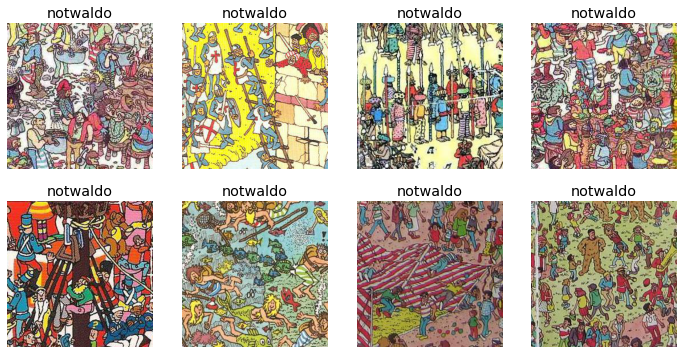

In [12]:
dls = waldo.dataloaders(basePath/str(size))
dls.valid.show_batch(max_n=8, nrows=2)

## Training

### Fine_tune & Fit_one_cycle
To begin training the model, fastAi has the fit_one_cycle method on their learner classes, which does one cycle of forward propagation and backpropagation, on the training and validation sets.  
  
The fine_tune method wraps the fit_one_cycle method in a loop, but it also automatically implements some of the more usual things, such as, freezing the first epoch for pretrained layers and slicing and varying the learn rate over the epochs.  
  
If as a developer you want total control, you can call the freeze, and unfreeze whenever you want while running fit_one_cycle the exact number of times, with the learn rate you want in that one epoch. But the fine_tune method is there exactly to make this easier. If the extra things it brings are not something you want, they can be modified via the input parameters.

In [13]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(32)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,1.583049,0.994739,0.439394,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.142353,1.560492,0.227273,00:05
1,0.953696,0.967694,0.469697,00:05
2,0.891525,0.908870,0.545455,00:05
3,0.781653,0.935929,0.590909,00:05
4,0.720428,0.916713,0.545455,00:04
5,0.670803,0.908937,0.681818,00:05
6,0.612425,0.778109,0.787879,00:05
7,0.564583,0.796883,0.696970,00:04
8,0.514683,0.865278,0.727273,00:05
9,0.474281,0.648455,0.803030,00:05


## Evaluation

To evaluate our models performance, we've been using the confusion matrix a lot. It gives us a decent look into how the model is guessing, even if the loss is very and accuracy very high, because of our very unbalance data, the model might still be performing really badly.  
For this the Confusion matrix gives a good insight into wether or not the model has atleast tried to guess "Waldo".

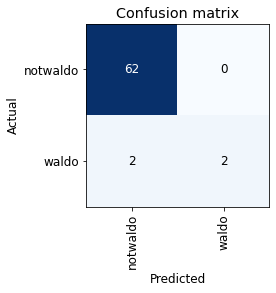

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

It looks like our results suffer due to the imbalanced by the huge amount of "NotWaldo" versus the very low amount of "Waldo" images we have.  
  
This seems to result in a very favorable strategy where is simply guesses for "NotWaldo", and our goal for improving this will be to make it more rewarding to guess for "Waldo".

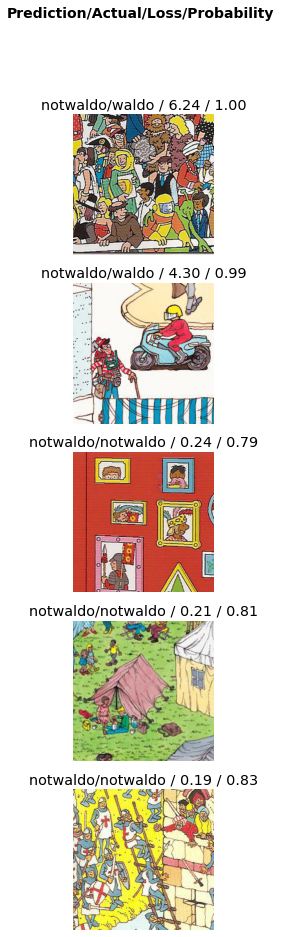

In [15]:
interp.plot_top_losses(5, nrows=5)

## Tuning

### Learning Rate

Tried Learn Rate

SuggestedLRs(valley=0.0005754399462603033)

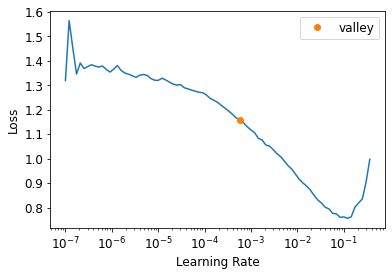

In [16]:
learnCustomRate = cnn_learner(dls, resnet50, metrics=error_rate)
learnCustomRate.lr_find()

As described in chapter 5, we just take a number well between where the line starts descreasing, but well before it cuts back up. So about 1e-3 should be a good base learn rate.

In [17]:
learnCustomRate = cnn_learner(dls, resnet50, metrics=error_rate)
learnCustomRate.fit_one_cycle(16, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.208190,0.255087,0.075758,00:04
1,1.220740,0.445448,0.242424,00:04
2,1.104452,0.523656,0.272727,00:04
3,0.989074,0.657486,0.348485,00:04
4,0.923017,0.755339,0.333333,00:04
5,0.857896,0.598752,0.227273,00:04
6,0.804203,0.791146,0.242424,00:04
7,0.733388,0.926551,0.303030,00:04
8,0.684571,0.793925,0.257576,00:04
9,0.632932,0.696784,0.196970,00:04


In [18]:
learnCustomRate.unfreeze()

SuggestedLRs(valley=2.0892961401841603e-05)

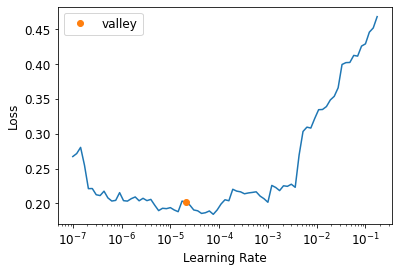

In [19]:
learnCustomRate.lr_find()

We've run a lot more epochs than they did because running less makes it resemble the example less.  
What we want is to see a flat bit at the start, before a steep increase. Running less epochs makes the graph resemble the untrained learn rate finding more.  
  
By comparison, the flat bit is similar, which is what we were aiming for, since that shows the range of learn rates we can use without messing up the training.  
The increase isn't as clear and steep in our example, but it should still be okey, as long as we pick a max learn rate well before it begins.

In [20]:
learnCustomRate.fit_one_cycle(64, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.176669,0.691453,0.212121,00:05
1,0.182104,0.692105,0.212121,00:05
2,0.216290,0.706188,0.212121,00:05
3,0.209964,0.701830,0.212121,00:05
4,0.205216,0.678974,0.212121,00:05
5,0.193718,0.658094,0.196970,00:05
6,0.183843,0.645636,0.196970,00:05
7,0.174195,0.655168,0.196970,00:05
8,0.170257,0.661682,0.196970,00:05
9,0.179073,0.676534,0.196970,00:05


Plotting the plot_loss has shown us that compared to the examples in chapter 5, we need a lot more epochs to 

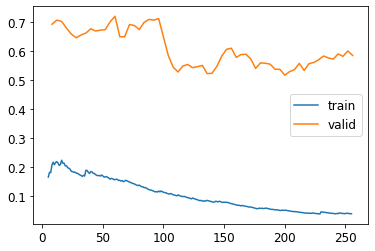

In [21]:
learnCustomRate.recorder.plot_loss()

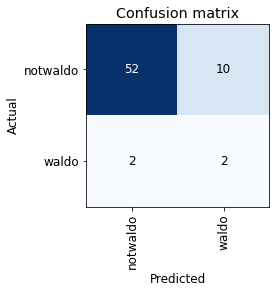

In [22]:
interp = ClassificationInterpretation.from_learner(learnCustomRate)
interp.plot_confusion_matrix()

Us restricting the learn rate manually, looks to have made it overfitting towards "NotWaldo" a lot more than expected.  
  
We want the opposite effect, we want to have more "Waldo" guesses. FastAi's Fine_tune method, as we described shortly earlier, has a lot build in from the start. One of those things, is the ability to vary the learn rate over the epochs.  
  
It looks like letting it control the learn rate dynamicly is the better choice in this case.

### Gray Scale

Waldo is red and white, while the backgrounds also include a lot of red and white patterns to throw off the reader. Because of this we tried to grayscale the images to lower the risk of just learning red/white patterns.

In [23]:
class ToGrayscaleTransform(Transform):
    def encodes(self, x:Image.Image):
        grey_img = x.convert("L")
        a = np.asarray(grey_img)
        rgb = np.stack([a,a,a], axis=-1)
        #print(f"shape of rgb data: {rgb.shape}")
        return Image.fromarray(rgb, mode="RGB")

In [24]:
greyWaldo = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=5),
    get_y=parent_label,
    item_tfms = [Resize(size, method=ResizeMethod.Pad), ToGrayscaleTransform()])

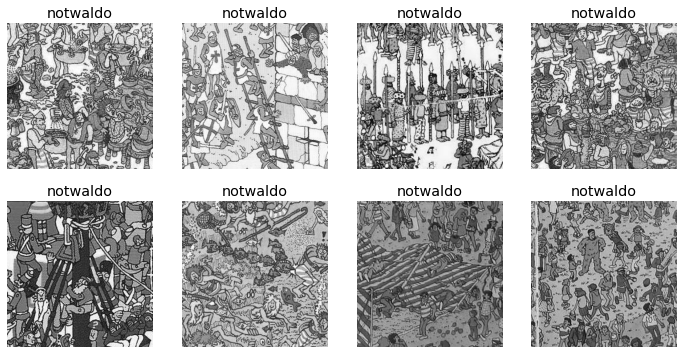

In [25]:
dlsGrey = greyWaldo.dataloaders(basePath/str(size))
dlsGrey.valid.show_batch(max_n=8, nrows=2)

In [32]:
learnGrey = cnn_learner(dlsGrey, resnet50, metrics=accuracy)
learnGrey.fine_tune(32)

epoch,train_loss,valid_loss,accuracy,time
0,1.229302,0.319711,0.893939,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.890530,0.789696,0.515152,00:05
1,0.878614,0.868878,0.530303,00:05
2,0.838407,1.520896,0.393939,00:05
3,0.784513,2.178863,0.196970,00:05
4,0.726032,2.627605,0.181818,00:05
5,0.672944,2.875673,0.181818,00:05
6,0.630190,3.280215,0.212121,00:05
7,0.571378,2.453685,0.378788,00:05
8,0.530660,1.591202,0.515152,00:05
9,0.510092,1.237205,0.545455,00:05


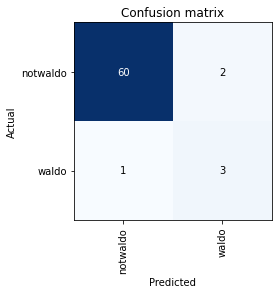

In [33]:
interp = ClassificationInterpretation.from_learner(learnGrey)
interp.plot_confusion_matrix()

Our theory was, that Waldo being red and white stribed, would make the model look for red and white patterns. This could be bad, because the pictures, deliberatly include a lot of red and white patterns all over the place to throw the reader off.  
  
However this is harshly disproven as the result is almost as identical as they can be. So the convolutional network of a resnet50, seems to do a really good job of handling colour images without overfitting on the colours themselves too much.

### Focal Loss

Focal Loss is one of the many loss functions available from FastAi, the loss functions are used during the training by the model to evaluate the performance of the model. Loss is different from accuracy in the way that getting closer to the right answer, but still being wrong improves loss, while the accurace only icrease with more correct answers.  
Focal Loss is the same as cross entropy except easy-to-classify observations are down-weighted in the loss calculation. The strength of down-weighting is proportional to the size of the gamma parameter. Put another way, the larger gamma the less the easy-to-classify observations contribute to the loss.

class FocalLossFlat(args, gamma=2, axis=-1, weight=None, ignore_index=-100, reduction='mean', *kwargs) :: CrossEntropyLossFlat  
  
  
To change to loss function used during training the model, all we need to do is set the loss_func variable when we instantiate the learner class.

In [34]:
learnFocal = cnn_learner(dls, resnet50, metrics=accuracy, loss_func=FocalLossFlat())
learnFocal.fine_tune(32)

epoch,train_loss,valid_loss,accuracy,time
0,0.914626,0.206593,0.818182,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.720836,1.642725,0.181818,00:05
1,0.705239,0.558046,0.439394,00:05
2,0.688387,0.585306,0.575758,00:05
3,0.625696,0.495733,0.621212,00:05
4,0.598231,0.343704,0.666667,00:05
5,0.559669,0.405528,0.636364,00:05
6,0.521707,0.925394,0.606061,00:05
7,0.490837,0.237510,0.757576,00:05
8,0.452202,0.244001,0.818182,00:05
9,0.425332,0.600391,0.742424,00:05


In [36]:
interpFocal = ClassificationInterpretation.from_learner(learnFocal)
interpFocal.plot_confusion_matrix()

RuntimeError: ignored

In [37]:
interpFocal.plot_top_losses(5, nrows=5)

NameError: ignored

### Progressive Resizing

Progressive Resizing seems interesting to us, since we have multiple image sizes in our data, but for now only used one at a time.

In [29]:
# Progressive Resizing
def get_dls(bs, folder, imgSize):
  waldo = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=5),
    get_y=parent_label,
    item_tfms = Resize(imgSize, method=ResizeMethod.Pad),
    batch_tfms=[*aug_transforms(size=imgSize, min_scale=0.75),
                Normalize.from_stats(*imagenet_stats)])
  return waldo.dataloaders(basePath/str(folder), bs=bs)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


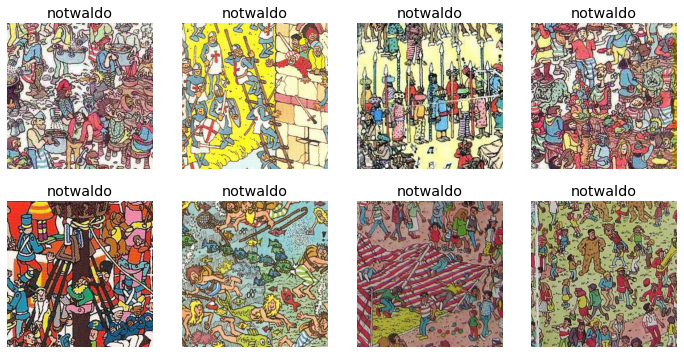

In [30]:
dlsResize = get_dls(32, size, size) #For Progressive Resizing
dlsResize.valid.show_batch(max_n=8, nrows=2)

In [38]:
# Progressive Resizing
dlsResize = get_dls(32, size, size//2)
learnResize = Learner(dlsResize, xresnet50(n_out=dlsResize.c), metrics=accuracy)
learnResize.fit_one_cycle(8, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.530068,0.539678,0.939394,00:02
1,0.636369,1.950181,0.939394,00:02
2,0.749281,0.777124,0.878788,00:02
3,0.700043,0.339372,0.878788,00:02
4,0.611668,0.238233,0.909091,00:02
5,0.544380,0.262025,0.909091,00:02
6,0.495491,0.242540,0.924242,00:02
7,0.455237,0.232993,0.924242,00:02


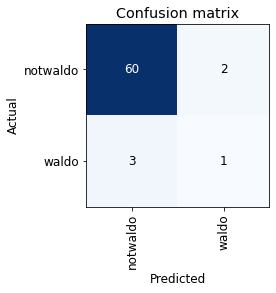

In [39]:
interpResize = ClassificationInterpretation.from_learner(learnResize)
interpResize.plot_confusion_matrix()

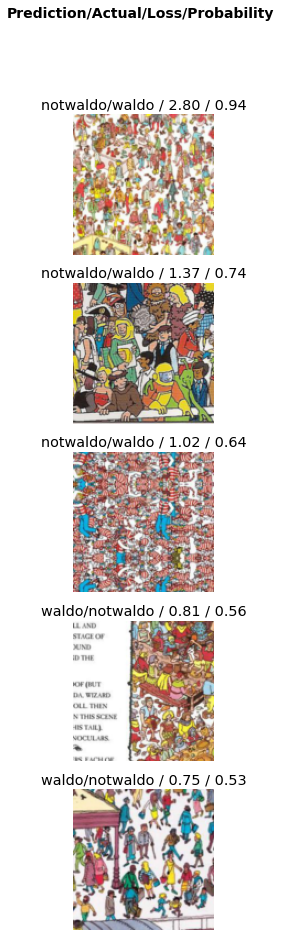

In [40]:
interpResize.plot_top_losses(5, nrows=5)

#### Normalization
Normalization is where you normalize your data, which makes it easier for the neural network, as it reduces noise from the data it receives, as data can come in different sizes.  
When you normalize some data, you set a defined range, which will typically be 0-1. Both FastAI and PyTorch have different forms of normalization. The different implementations of normalization each have their advantages and disadvantages, and solve different problems that arise with one of the others, which means that you have to try and see which normalization best suits what you are working with.  
  
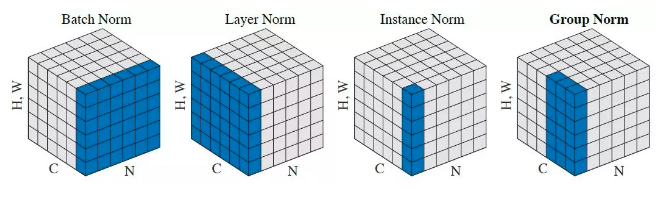


Normally FastAi automatically does normalization, but here we set it to false to specifically test out progressive rezising.

In [44]:
learnResize.dls = get_dls(16, size, size)
learnResize = cnn_learner(dlsResize, xresnet50, normalize=True, pretrained=False, metrics=accuracy, loss_func=CrossEntropyLossFlat())
learnResize.fine_tune(32)

epoch,train_loss,valid_loss,accuracy,time
0,1.642614,4.470088,0.090909,00:02


epoch,train_loss,valid_loss,accuracy,time
0,1.252468,0.964605,0.590909,00:02
1,1.091261,1.473586,0.530303,00:02
2,1.063659,1.908729,0.378788,00:02
3,0.989844,1.092559,0.545455,00:02
4,0.965012,0.661099,0.787879,00:02
5,0.948195,1.365352,0.515152,00:02
6,0.894961,1.073301,0.681818,00:02
7,0.857462,1.042901,0.636364,00:02
8,0.811982,0.668187,0.742424,00:02
9,0.771263,0.525121,0.863636,00:02


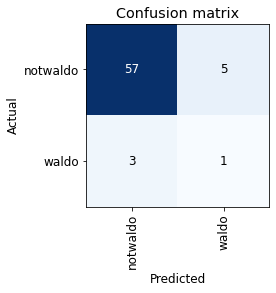

In [46]:
interp = ClassificationInterpretation.from_learner(learnResize)
interp.plot_confusion_matrix()

## Prediction


### Export Learner

In [46]:
learnFocal.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner('export.pkl')

### Upload image

In [51]:
out_pl = widgets.Output()
btn_run = widgets.Button(description='Classify')
btn_upload = widgets.FileUpload()
classifyPath = 'gdrive/MyDrive/WhereIsWaldo2/Classification'
out_pl.clear_output()

In [52]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    imgName = 'Classify' + str(len(btn_upload.data))
    imgPath = classifyPath + '/' + imgName + '.jpg'
    img.save(imgPath)
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    #Split img
    sliceImg(imgPath, classifyPath, size)
    sliceFolder = classifyPath + '/Img' + imgName + '_' + str(size)
    #Pred every img
    files = [file for file in os.listdir(sliceFolder) if file.startswith(str(imgName))]
    for file in files:
      print(file)
      tmp = PILImage.create(sliceFolder + '/' + file)
      pred,pred_idx,probs = learn_inf.predict(tmp)
      print(str(pred) + ': ' + f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')
      if pred == 'notwaldo':
        #save img as with new color
        imgSlice = Image.open(sliceFolder + '/' + file)
        graySlice = ImageOps.grayscale(imgSlice)
        graySlice.save(sliceFolder + '/' + file)
    #Merge img
    mergeImg(imgName, sliceFolder, classifyPath)

btn_run.on_click(on_click_classify)

In [53]:
VBox([widgets.Label('Select your Waldo Image!'), 
      btn_upload, btn_run])

gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x000.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x000.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x000.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x256.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x256.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x256.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x512.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x512.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x512.y512.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x768.y000.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Classify1.x768.y256.jpg
gdrive/MyDrive/WhereIsWaldo2/Classification/ImgClassify1_256/Clas

notwaldo: Prediction: notwaldo; Probability: 0.7819
Classify1.x512.y512.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8602
Classify1.x512.y000.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9812
Classify1.x1024.y000.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8508
Classify1.x512.y256.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9707
Classify1.x1024.y512.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9866
Classify1.x256.y256.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9890
Classify1.x768.y512.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8427
Classify1.x000.y000.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8900
Classify1.x000.y256.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8139
Classify1.x768.y256.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9112
Classify1.x256.y512.jpg


notwaldo: Prediction: notwaldo; Probability: 0.8916
Classify1.x768.y000.jpg


notwaldo: Prediction: notwaldo; Probability: 0.9188
Classify1.x256.y000.jpg


notwaldo: Prediction: notwaldo; Probability: 0.7470
Classify1.x1024.y256.jpg


waldo: Prediction: waldo; Probability: 0.7834
15 input files found
Out file: Classify1_new.jpg
height: 256 Width: 175
Classify1.x1024.y256
Combined image should be 1199 by 512
Classify1.x000.y512
Classify1.x512.y512
Classify1.x512.y000
Classify1.x1024.y000
Classify1.x512.y256
Classify1.x1024.y512
Classify1.x256.y256
Classify1.x768.y512
Classify1.x000.y000
Classify1.x000.y256
Classify1.x768.y256
Classify1.x256.y512
Classify1.x768.y000
Classify1.x256.y000
Classify1.x1024.y256
Image saved in gdrive/MyDrive/WhereIsWaldo2/Classification
Image saved as Classify1_new.jpg
